Import modules for data analysis

In [1]:
#import modules for data analysis
import pandas as pd 
import numpy as numpy 
import matplotlib.pyplot as plt 
import spicy as sc
import sklearn as sk
import seaborn as sns

Data Acquisition

In [2]:
df= pd.read_csv('heart.csv')

Scanning the dataframe

In [3]:
#What the dataframe looks like?
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
#dimensions
df.shape

(1025, 14)

In [6]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 1025
Number of columns 14


In [7]:
#what are the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Taking care of missing values

In [8]:
#check null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Taking Caring of duplicate Values

In [9]:
#check for duplicate data and drop them
data_dup= df.duplicated().any()
print(data_dup)

True


In [10]:
df= df.drop_duplicates()

In [11]:
df.shape

(302, 14)

In [12]:
#Get overall statistics about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data Preprocessing

Data Cleaning

In [13]:
import  numpy as np
# Handling missing values
df.dropna(inplace=True)  # Drop rows with missing values
# Handling outliers
from scipy import stats
z_scores = stats.zscore(df)  # Calculate z-scores
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Filter outliers based on z-scores
df = df[filtered_entries]


In [14]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [15]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding Categorical Data

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [19]:
if 'sex' in cate_val:
    cate_val.remove('sex')

if 'target' in cate_val:
    cate_val.remove('target')

df = pd.get_dummies(df, columns=cate_val, drop_first=True)


In [20]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,True,False,False,False,True,False,True,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,True,False,False,False,True,True,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,True,False,False,True,False,False,False,True,True,False


Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
st= StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [23]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,-0.257180,1,-0.355165,-0.709016,0.808268,-0.004522,0,False,False,False,...,True,False,False,False,True,False,True,False,False,True
1,-0.147015,1,0.529153,-0.905348,0.230779,1.942086,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1.725795,1,0.823925,-1.537974,-1.101888,1.478608,0,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,0.734307,1,1.000789,-0.905348,0.497312,-0.931478,0,False,False,False,...,True,False,False,False,True,True,False,False,False,True
4,0.844473,0,0.411244,1.079790,-1.945911,0.829739,0,False,False,False,...,True,False,False,True,False,False,False,True,True,False


Splitting the dataset into training and test set

In [24]:
X= df.drop('target',axis=1)

In [25]:
y= df['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42) 

In [28]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
189,1.064803,1,-0.355165,1.407010,-0.835355,0.737043,False,True,False,False,True,False,True,True,False,False,False,False,False,True
27,0.403811,0,0.293335,1.625157,0.097512,-0.931478,True,False,False,True,False,False,False,False,True,False,True,False,True,False
173,-1.689329,0,-2.182755,-0.992607,1.296913,-0.931478,False,True,False,False,True,False,False,False,True,False,False,False,True,False
358,0.513977,1,0.175426,-0.883533,0.541735,-0.189913,False,False,True,False,True,False,False,False,True,False,True,False,True,False
76,-0.697841,1,-0.414120,0.229016,1.119224,-0.931478,False,True,False,True,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.064803,0,0.529153,1.494269,-0.746510,-0.746087,False,True,False,False,True,False,False,False,True,False,False,False,False,True
85,-1.138503,1,-0.649938,-0.534498,0.897112,-0.931478,True,False,False,False,True,False,False,False,True,False,False,False,True,False
137,1.064803,0,2.887334,1.756045,0.186357,-0.931478,False,False,False,False,True,False,True,False,True,False,False,False,True,False
611,0.073316,0,-0.178301,-0.861719,-0.879777,0.922434,False,False,False,False,False,True,True,True,False,True,False,False,False,True


In [29]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
9,-0.036850,1,-0.532029,0.905272,-1.501688,2.034782,False,False,False,False,False,False,True,True,False,False,True,False,True,False
522,1.395299,0,1.236607,0.708940,0.985957,-0.931478,False,True,False,False,True,False,False,False,True,True,False,False,True,False
194,1.395299,1,1.708243,0.905272,-1.857066,0.458956,False,False,False,False,False,False,True,True,False,False,False,True,True,False
342,1.174968,0,1.413471,0.534422,-0.080177,-0.189913,False,True,False,False,True,False,False,False,True,False,False,False,True,False
380,0.403811,1,0.882880,-0.578128,-1.990333,0.922434,False,False,False,False,True,False,False,True,False,True,False,False,False,True
304,-0.257180,0,0.293335,-1.058051,0.852690,-0.838782,False,True,False,False,False,False,False,True,False,False,False,False,True,False
117,-1.248668,1,-0.649938,-1.472530,-1.323999,1.385912,False,False,False,False,False,False,True,True,False,False,False,False,False,True
88,0.844473,0,0.529153,0.512607,0.452890,2.405564,False,False,False,False,False,False,False,False,False,False,True,False,True,False
141,0.954638,0,-0.414120,-1.036236,-0.613244,-0.931478,False,False,False,False,True,False,True,True,False,False,False,False,True,False
36,-0.367346,1,-0.355165,-0.687201,-1.101888,0.366261,False,False,True,False,False,False,True,False,True,True,False,False,True,False


Feature Selection

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Assuming X_train and y_train are your feature matrix and target vector
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
feature_importances = dt_classifier.feature_importances_


Logistic Regression

In [31]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,-0.257180,1,-0.355165,-0.709016,0.808268,-0.004522,0,False,False,False,...,True,False,False,False,True,False,True,False,False,True
1,-0.147015,1,0.529153,-0.905348,0.230779,1.942086,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1.725795,1,0.823925,-1.537974,-1.101888,1.478608,0,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,0.734307,1,1.000789,-0.905348,0.497312,-0.931478,0,False,False,False,...,True,False,False,False,True,True,False,False,False,True
4,0.844473,0,0.411244,1.079790,-1.945911,0.829739,0,False,False,False,...,True,False,False,True,False,False,False,True,True,False


In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_predl= log.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_predl)

0.896551724137931

SVC

In [36]:
from sklearn import svm

In [37]:
svm=svm.SVC()

In [38]:
svm.fit(x_train,y_train)

SVC()

In [39]:
y_pred3= svm.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred3)

0.8448275862068966

KNeighbour Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn= KNeighborsClassifier()

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
pred= knn.predict(x_test)

In [45]:
accuracy_score(y_test,pred)

0.8448275862068966

In [46]:
score=[]

for k in range(1,40):

    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predd= knn.predict(x_test)
    score.append(accuracy_score(y_test,y_predd))

In [47]:
score

[0.7241379310344828,
 0.7241379310344828,
 0.8103448275862069,
 0.7758620689655172,
 0.8448275862068966,
 0.7931034482758621,
 0.8448275862068966,
 0.8275862068965517,
 0.8275862068965517,
 0.8448275862068966,
 0.8448275862068966,
 0.8275862068965517,
 0.8275862068965517,
 0.8275862068965517,
 0.8448275862068966,
 0.8275862068965517,
 0.8448275862068966,
 0.8448275862068966,
 0.8448275862068966,
 0.8448275862068966,
 0.8448275862068966,
 0.8448275862068966,
 0.8275862068965517,
 0.8275862068965517,
 0.8275862068965517,
 0.8275862068965517,
 0.8275862068965517,
 0.8103448275862069,
 0.8275862068965517,
 0.8103448275862069,
 0.8103448275862069,
 0.8103448275862069,
 0.8103448275862069,
 0.8103448275862069,
 0.8103448275862069,
 0.8103448275862069,
 0.7931034482758621,
 0.8103448275862069,
 0.8103448275862069]

In [48]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_predd= knn.predict(x_test)
accuracy_score(y_test,y_predd)

0.7241379310344828

Normalization

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Assuming X_train is your feature matrix
X_train_normalized = scaler.fit_transform(x_train)


Dealing with class imbalance

In [50]:
from sklearn.utils import resample
# Assuming X_train and y_train are your feature matrix and target vector
X_train_resampled, y_train_resampled = resample(x_train, y_train, random_state=42)


Non-Linear ML Algorithm

In [51]:
df= pd.read_csv('heart.csv')

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [53]:
df= df.drop_duplicates()

In [54]:
df.shape

(302, 14)

In [55]:
x= df.drop('target',axis=1)
y= df['target']

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier()

In [59]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred4= dt.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf= RandomForestClassifier()

In [64]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_predict= rf.predict(x_test)

In [66]:
accuracy_score(y_test,y_predict)

0.8360655737704918

Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
grb= GradientBoostingClassifier()

In [69]:
grb.fit(x_train,y_train)

GradientBoostingClassifier()

In [70]:
y_prediction= grb.predict(x_test)

In [71]:
accuracy_score(y_test,y_prediction)

0.819672131147541

In [72]:
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have y_test and y_predl as arrays of true labels and predicted labels

# Fill missing predictions with a placeholder value
placeholder_value = 0  # Adjust according to your data
full_y_predl = np.full_like(y_test, placeholder_value)  # Fill with placeholder value
full_y_predl[:len(y_predl)] = y_predl  # Assign actual predictions

# Calculate accuracy score
accuracy = accuracy_score(y_test, full_y_predl)
print("Accuracy:", accuracy)


Accuracy: 0.5245901639344263


In [73]:
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have y_test and y_predl, y_pred3, y_prediction, y_predd, y_pred4, y_predict as predicted labels

# Pad prediction arrays to length 61
def pad_array(arr):
    if len(arr) < 61:
        padding = np.zeros(61 - len(arr))
        arr = np.concatenate([arr, padding])
    return arr[:61]

y_predl_padded = pad_array(y_predl)
y_pred3_padded = pad_array(y_pred3)
y_prediction_padded = pad_array(y_prediction)
y_predd_padded = pad_array(y_predd)
y_pred4_padded = pad_array(y_pred4)
y_predict_padded = pad_array(y_predict)

# Calculate accuracy scores for each model
acc_lr = accuracy_score(y_test, y_predl_padded)
acc_svm = accuracy_score(y_test, y_pred3_padded)
acc_knn = accuracy_score(y_test, y_prediction_padded)
acc_dt = accuracy_score(y_test, y_predd_padded)
acc_rf = accuracy_score(y_test, y_pred4_padded)
acc_gb = accuracy_score(y_test, y_predict_padded)

# Create DataFrame
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
    'ACC': [acc_lr, acc_svm, acc_knn, acc_dt, acc_rf, acc_gb]
})


In [74]:
print("Number of samples in y_test:", len(y_test))
print("Number of samples in y_predl:", len(y_predl))
# Repeat for other predicted labels


Number of samples in y_test: 61
Number of samples in y_predl: 58


In [75]:
final_data

,Models,ACC
0,LR,0.524590
1,SVM,0.540984
2,KNN,0.819672
3,DT,0.491803
4,RF,0.704918
5,GB,0.836066


In [76]:
import seaborn as sns 

C:\Users\Addmin\AppData\Local\Temp\ipykernel_6468\2990182323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data,palette='viridis')


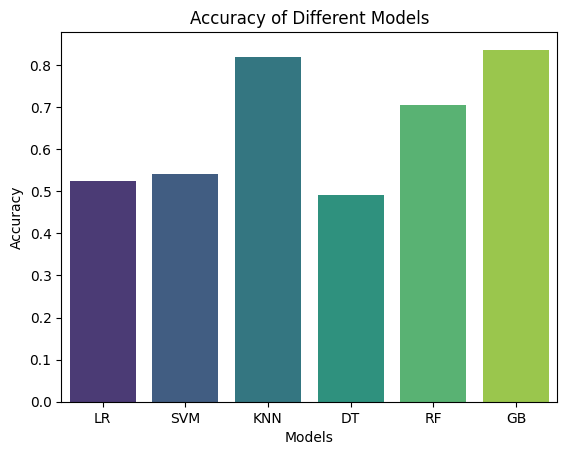

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data contains 'Models' and 'ACC' columns

# Create bar plot
sns.barplot(x='Models', y='ACC', data=final_data,palette='viridis')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Show plot
plt.show()


In [78]:
x= df.drop('target',axis=1)
y=df['target']

In [79]:
x.shape

(302, 13)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf= RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

Prediction on new data

In [82]:
import pandas as pd

In [83]:
new_data= pd.DataFrame({'age':53,
                        'sex':1,
                        'cp':0,
                        'trestbps':125,
                        'chol':212,
                        'fbs':0,
                        'restecg':1,
                        'thalach':168,
                        'exang':0,
                        'oldpeak':1.0, 'slope': 2,'ca':2,'thal':3,},index= [0])

In [84]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,0,125,212,0,1,168,0,1.0,2,2,3


In [85]:
p= rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else: 
    print("Disease")

No Disease


Save model using joblib

In [86]:
import joblib

In [87]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [88]:
model= joblib.load('model_joblib_heart')

In [89]:
model.predict(new_data)

array([0], dtype=int64)

In [90]:
from tkinter import * 
import joblib

In [91]:
from tkinter import Tk, Label, Entry, Button, Frame

def show_entry_fields():
    # Retrieve values from entry fields
    p1 = int(entries[0].get())
    p2 = int(entries[1].get())
    p3 = int(entries[2].get())
    p4 = int(entries[3].get())
    p5 = int(entries[4].get())
    p6 = int(entries[5].get())
    p7 = int(entries[6].get())
    p8 = int(entries[7].get())
    p9 = int(entries[8].get())
    p10 = float(entries[9].get())
    p11 = int(entries[10].get())
    p12 = int(entries[11].get())
    p13 = int(entries[12].get())

    # Placeholder for model prediction
    result = 0
    
    # Update solution label based on model prediction
    if result == 0:
        solution_label.config(text="No Heart Disease")
    else:
        solution_label.config(text="Heart Disease Detected")

# Create Tkinter window
master = Tk()
master.title("Heart Diseases Prediction System")

# Create a frame for the header
header_frame = Frame(master)
header_frame.pack()

# Header label
header_label = Label(header_frame, text="Heart Diseases Prediction System", bg="black", fg="white")
header_label.pack(pady=10)

# Create a frame for input fields
input_frame = Frame(master)
input_frame.pack()

# Labels for input fields
labels = ["Age:", "Sex (1: Male, 0: Female):", "Chest Pain Type (cp):", 
          "Resting Blood Pressure (trestbps):", "Serum Cholesterol (chol):", 
          "Fasting Blood Sugar (fbs):", "Resting Electrocardiographic Results (restecg):",
          "Maximum Heart Rate Achieved (thalach):", "Exercise Induced Angina (exang):",
          "ST Depression Induced by Exercise Relative to Rest (oldpeak):", "Slope of the Peak Exercise ST Segment (slope):",
          "Number of Major Vessels Colored by Flourosopy (ca):", "Thalassemia (thal):"]

# Create entry fields
entries = []
for i, label_text in enumerate(labels):
    label = Label(input_frame, text=label_text)
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = Entry(input_frame)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Button to trigger the function
btn = Button(master, text='Submit', command=show_entry_fields)
btn.pack(pady=10)

# Solution box to display result
solution_label = Label(master, text="")
solution_label.pack()

# Start the Tkinter event loop
master.mainloop()


EDA

Draw Correlation Matrix

<Axes: >

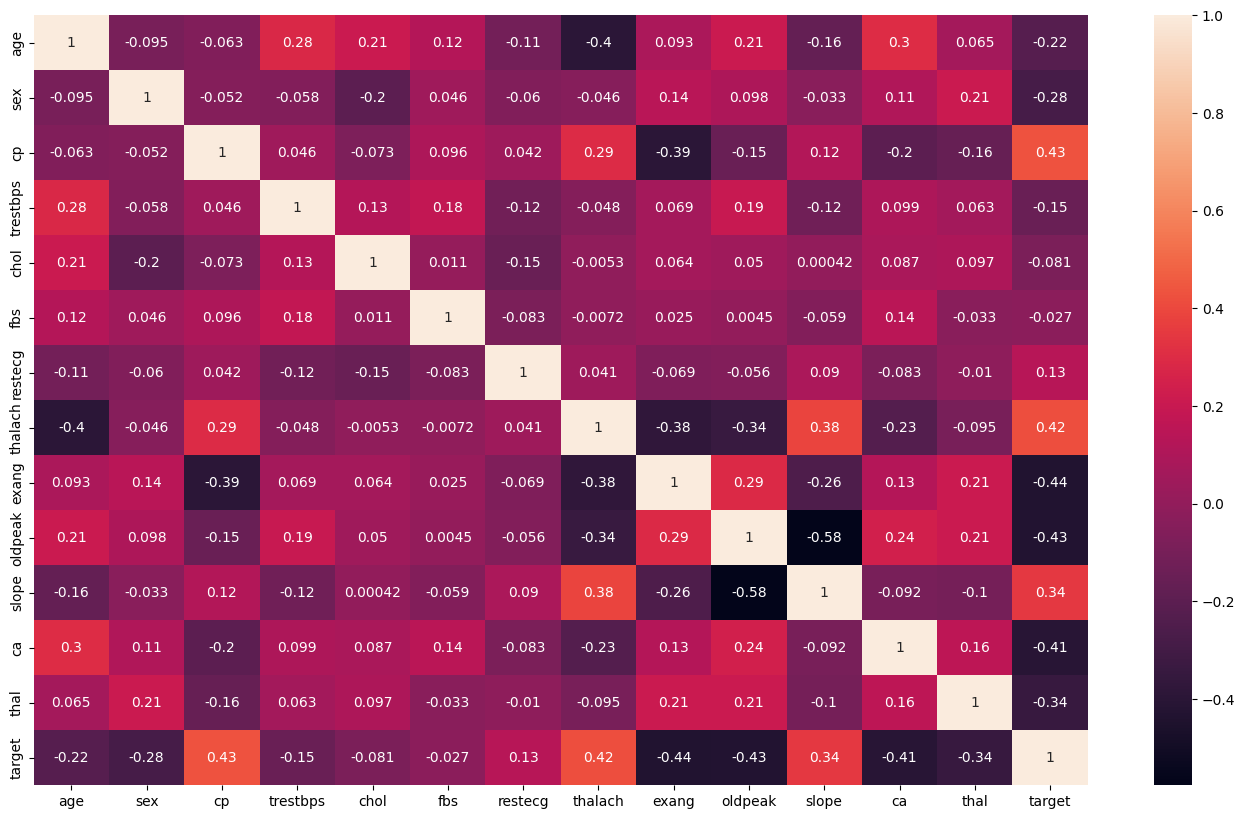

In [92]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)

How many people have heart disease, and how many dont have heart disease in the dataset?

In [93]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [94]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

C:\Users\Addmin\AppData\Local\Temp\ipykernel_6468\2649808854.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='RdBu_r')


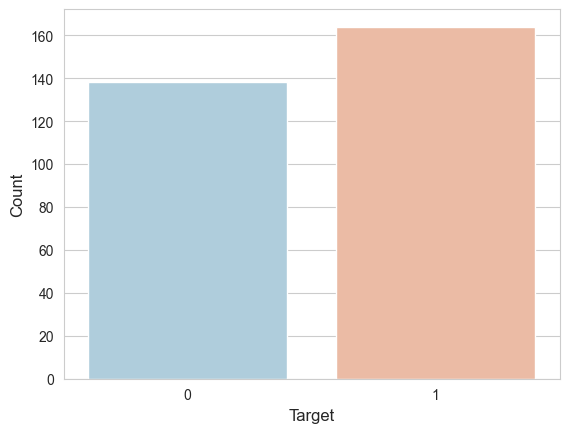

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style('whitegrid')

# Create countplot
ax = sns.countplot(x='target', data=df, palette='RdBu_r')

# Add labels
ax.set_xlabel('Target', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Show plot
plt.show()


Find count of male and female in the dataset

In [96]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [97]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

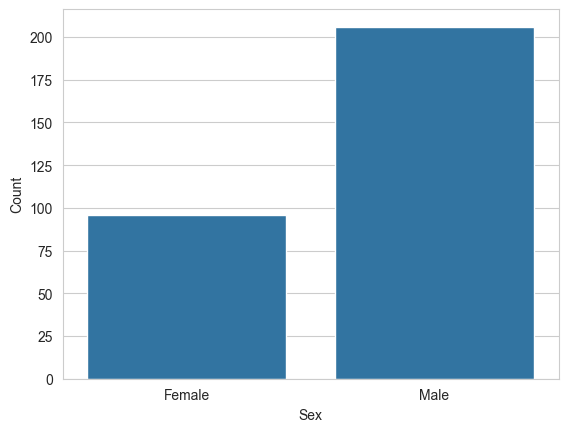

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
sns.countplot(x='sex', data=df)

# Customize x-axis ticks
plt.xticks([0, 1], ['Female', 'Male'])

# Set x-axis label
plt.xlabel('Sex')

# Set y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()


Find gender distribution according to the target variable

In [99]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

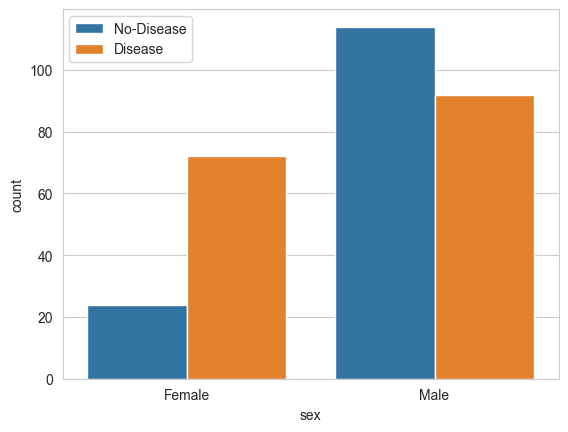

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot with hue
sns.countplot(x='sex', hue='target', data=df)

# Customize x-axis ticks
plt.xticks([1, 0], ['Male', 'Female'])

# Set legend labels
plt.legend(labels=['No-Disease', 'Disease'])

# Show the plot
plt.show()



Check age distribution in the dataset

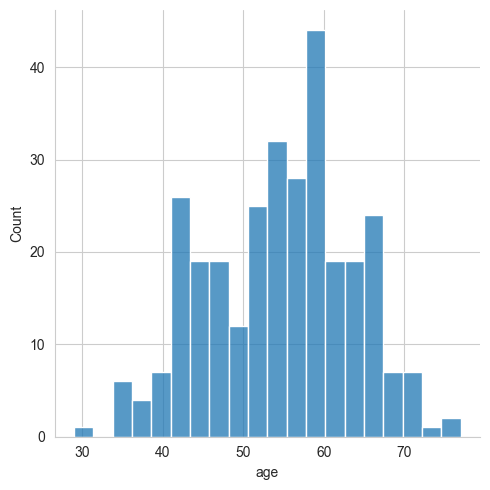

In [101]:
sns.displot(df['age'],bins=20)

Check chest pain type

Chest pain type(4 values)
value 0: typical angina
value 1 : atypical angina
value 2: non-anginal pain
value 3: asymptomatic

C:\Users\Addmin\AppData\Local\Temp\ipykernel_6468\1588356523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cp', data=df, palette='RdBu_r')
C:\Users\Addmin\AppData\Local\Temp\ipykernel_6468\1588356523.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])


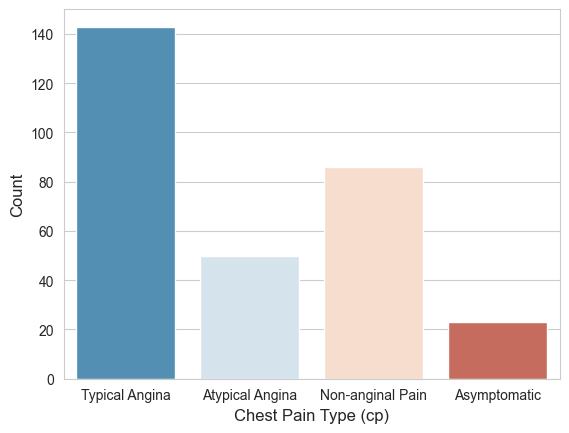

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style('whitegrid')

# Create countplot
ax = sns.countplot(x='cp', data=df, palette='RdBu_r')

# Add labels
ax.set_xlabel('Chest Pain Type (cp)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Set custom x-axis tick labels
ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Show plot
plt.show()


Show the chest pain distribution as per target variable 

In [103]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

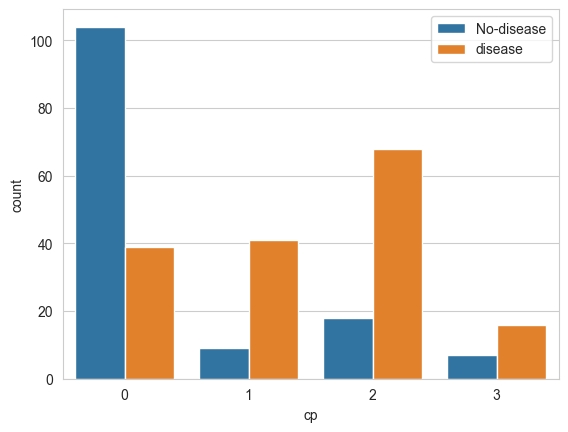

In [104]:
sns.countplot(x="cp",hue="target",data=df)
plt.legend(labels= ["No-disease","disease"])

Show fasting blood sugar ddistribution according to target variable 

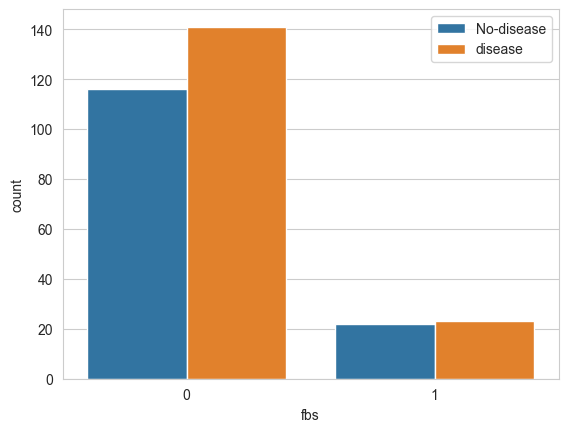

In [105]:
sns.countplot(x="fbs",hue="target",data=df)
plt.legend(labels=["No-disease","disease"])


Check Resting Blood Pressure Distribution

In [106]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

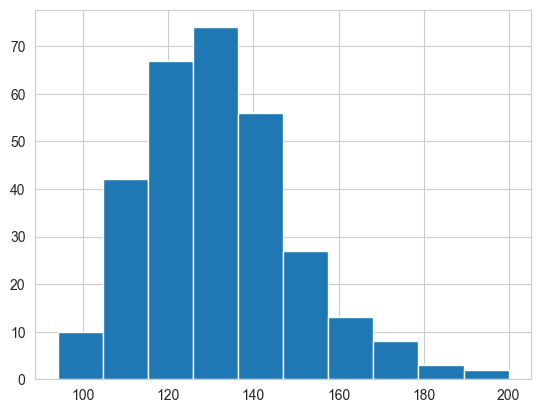

In [107]:
df['trestbps'].hist()

Compare Resting blood pressure as per sex column

C:\Users\Addmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Addmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


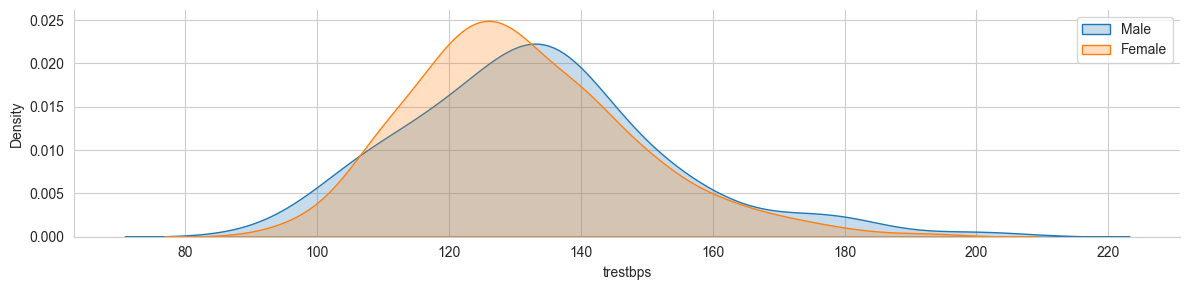

In [108]:
g = sns.FacetGrid(df,hue="sex",aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

Show distribution of serum cholesttrol

In [109]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

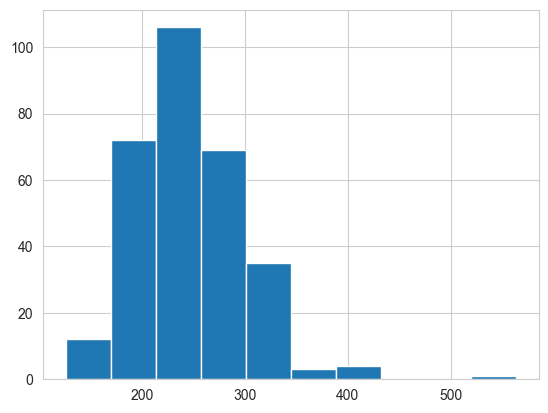

In [110]:
df['chol'].hist()

Plot Continuous Variables

In [111]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [112]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

print("Categorical Variables:", cate_val)
print("Continuous Variables:", cont_val)


Categorical Variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [113]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [114]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

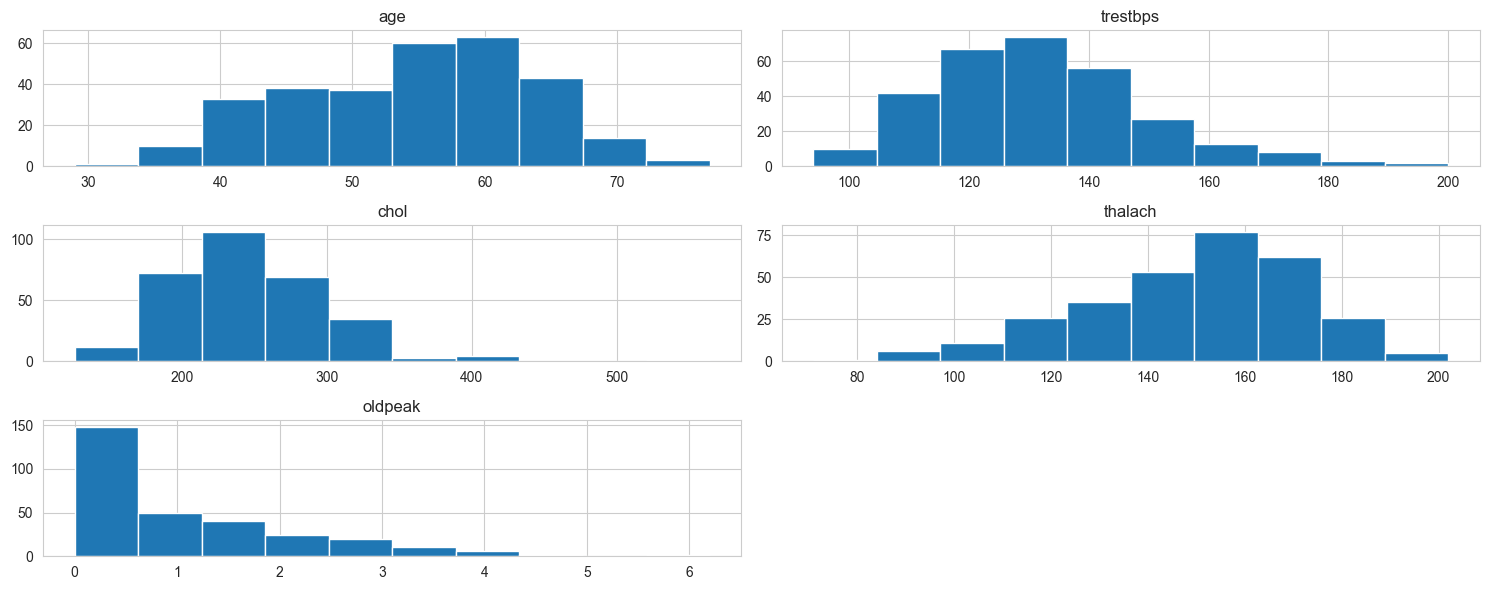

In [115]:
df.hist(cont_val,figsize=(15,6))
plt.tight_layout()